# Task 1.2: Feature Extraction \& Engineering

In [413]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

## Loading the new dataset

In [414]:
df = pd.read_csv('../dataset/new_customer_supermarket.csv', sep='\t', index_col=0)
df

,BasketID,BasketDate,Sale,CustomerID,ProdID,ProdDescr,Qta,TotSale
0,539993,2011-04-01 10:00:00,1.95,13313.0,22386,JUMBO BAG PINK POLKADOT,10,19.5
1,539993,2011-04-01 10:00:00,0.42,13313.0,21499,BLUE POLKADOT WRAP,25,10.5
2,539993,2011-04-01 10:00:00,0.42,13313.0,21498,RED RETROSPOT WRAP,25,10.5
3,539993,2011-04-01 10:00:00,2.10,13313.0,22379,RECYCLING BAG RETROSPOT,5,10.5
4,539993,2011-04-01 10:00:00,1.25,13313.0,20718,RED RETROSPOT SHOPPER BAG,10,12.5
...,...,...,...,...,...,...,...,...
280142,581585,2011-09-12 12:31:00,0.95,15804.0,23145,ZINC TLIGHT HOLDER STAR LARGE,12,11.4
280143,581585,2011-09-12 12:31:00,1.95,15804.0,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,23.4
280144,581586,2011-09-12 12:49:00,2.95,13113.0,22061,LARGE CAKE STAND HANGING STRAWBERY,8,23.6
280145,581586,2011-09-12 12:49:00,1.25,13113.0,23275,SET OF HANGING OWLS OLLIE BEAK,24,30.0


In [415]:
df.dtypes

BasketID        int64
BasketDate     object
Sale          float64
CustomerID    float64
ProdID         object
ProdDescr      object
Qta             int64
TotSale       float64
dtype: object

In [416]:
df = df.astype({'BasketDate': 'datetime64',
                'BasketID': 'object',
                'CustomerID': 'object'})

## Feature Extraction

The total number of items purchased by a customer during the period of observation:

In [417]:
I = df.groupby('CustomerID', as_index=False)['Qta'].sum()
I.columns = ['CustomerID', 'I']
I

,CustomerID,I
0,12747.0,792
1,12748.0,13173
2,12749.0,1225
3,12820.0,674
4,12821.0,68
...,...,...
3677,18280.0,40
3678,18281.0,52
3679,18282.0,51
3680,18283.0,1351


The number of distinct items bought by a customer in the period of observation:

In [418]:
Iu = df.groupby('CustomerID')['ProdID'].nunique().reset_index()
Iu.columns = ['CustomerID', 'Iu']
Iu

,CustomerID,Iu
0,12747.0,29
1,12748.0,1442
2,12749.0,120
3,12820.0,54
4,12821.0,5
...,...,...
3677,18280.0,8
3678,18281.0,5
3679,18282.0,8
3680,18283.0,258


The maximum number of items purchased by a customer during a shopping session:

In [419]:
Imax = df.groupby(['CustomerID', 'BasketID'], as_index=False)['Qta'].sum()[['CustomerID', 'Qta']].groupby('CustomerID', as_index=False)['Qta'].max()
Imax.columns = ['CustomerID', 'Imax']
Imax

,CustomerID,Imax
0,12747.0,140
1,12748.0,1222
2,12749.0,626
3,12820.0,244
4,12821.0,68
...,...,...
3677,18280.0,40
3678,18281.0,52
3679,18282.0,26
3680,18283.0,241


The Shannon entropy on the purchasing behaviour of the customer:

In [420]:
from scipy.stats import entropy

In [421]:
pd.DataFrame(df.groupby('CustomerID')['TotSale'].apply(lambda x : x.round().value_counts()))

TotSale
CustomerID              
12747.0    21.0       11
           20.0        9
           27.0        7
           35.0        5
           15.0        5
...                  ...
18287.0    7.0         2
           13.0        1
           31.0        1
           53.0        1
           18.0        1

[48552 rows x 1 columns]

In [422]:
E = df.groupby('CustomerID')['TotSale'].apply(lambda x : entropy(x.round().value_counts(), base=2)).reset_index()
E.columns = ['CustomerID', 'E']
E

,CustomerID,E
0,12747.0,3.811314
1,12748.0,3.634376
2,12749.0,3.656178
3,12820.0,3.227613
4,12821.0,1.521928
...,...,...
3677,18280.0,1.405639
3678,18281.0,1.370951
3679,18282.0,2.750000
3680,18283.0,2.603430


The average price spent by a customer during a shopping session:

In [423]:
Savg = df.groupby(['CustomerID', 'BasketID'], as_index=False)['TotSale'].sum()[['CustomerID', 'TotSale']].groupby('CustomerID', as_index=False)['TotSale'].mean()
Savg.columns = ['CustomerID', 'Savg']
Savg

,CustomerID,Savg
0,12747.0,238.871111
1,12748.0,109.595185
2,12749.0,547.546000
3,12820.0,230.905000
4,12821.0,75.720000
...,...,...
3677,18280.0,137.000000
3678,18281.0,46.920000
3679,18282.0,56.565000
3680,18283.0,124.792500


In [424]:
features = I.merge(Iu, on='CustomerID').merge(Imax, on='CustomerID').merge(E, on='CustomerID').merge(Savg, on='CustomerID').set_index('CustomerID')
features

,I,Iu,Imax,E,Savg
CustomerID,,,,,
12747.0,792,29,140,3.811314,238.871111
12748.0,13173,1442,1222,3.634376,109.595185
12749.0,1225,120,626,3.656178,547.546000
12820.0,674,54,244,3.227613,230.905000
12821.0,68,5,68,1.521928,75.720000
...,...,...,...,...,...
18280.0,40,8,40,1.405639,137.000000
18281.0,52,5,52,1.370951,46.920000
18282.0,51,8,26,2.750000,56.565000


### RFM Analysis

RFM (***Recency***, ***Frequency***, ***Monetary***) analysis is a *customer segmentation* technique that uses past purchase behavior to divide customers into groups.
RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

- ***Frequency*** is tthe number of orders for each customer;
- ***Recency*** is the number of days between present date and date of last purchase each customer;
- ***Monetary*** is tum of purchase price for each customer.

In [425]:
rfm = df.groupby('CustomerID').agg({'BasketDate': lambda date: (df['BasketDate'].max() - date.max()).days,
                                    'BasketID': lambda x: len(x),
                                    'TotSale': lambda sale: sale.sum()})
rfm.columns = ['R', 'F', 'M']
rfm

,R,F,M
CustomerID,,,
12747.0,23,65,2149.84
12748.0,4,3441,17754.42
12749.0,23,147,2737.73
12820.0,45,58,923.62
12821.0,96,5,75.72
...,...,...,...
18280.0,160,8,137.00
18281.0,4,5,46.92
18282.0,216,8,113.13


In [426]:
one_time_buyers = round(sum(rfm['F'] == 1) / float(len(rfm)) * (100), 2)
print('Percentage of customers purchase the item only once:', one_time_buyers, '%')

Percentage of customers purchase the item only once: 1.77 %


In [427]:
customer_profile = features.merge(rfm, on='CustomerID')
customer_profile

,I,Iu,Imax,E,Savg,R,F,M
CustomerID,,,,,,,,
12747.0,792,29,140,3.811314,238.871111,23,65,2149.84
12748.0,13173,1442,1222,3.634376,109.595185,4,3441,17754.42
12749.0,1225,120,626,3.656178,547.546000,23,147,2737.73
12820.0,674,54,244,3.227613,230.905000,45,58,923.62
12821.0,68,5,68,1.521928,75.720000,96,5,75.72
...,...,...,...,...,...,...,...,...
18280.0,40,8,40,1.405639,137.000000,160,8,137.00
18281.0,52,5,52,1.370951,46.920000,4,5,46.92
18282.0,51,8,26,2.750000,56.565000,216,8,113.13


## Feature Engineering

In [428]:
customer_profile.corr()

,I,Iu,Imax,E,Savg,R,F,M
I,1.000000,0.779651,0.656653,0.417184,0.393336,-0.280666,0.778021,0.958386
Iu,0.779651,1.000000,0.593328,0.441148,0.355314,-0.295112,0.848772,0.726917
Imax,0.656653,0.593328,1.000000,0.516863,0.776372,-0.223799,0.399807,0.589141
E,0.417184,0.441148,0.516863,1.000000,0.464397,-0.354308,0.263325,0.425445
Savg,0.393336,0.355314,0.776372,0.464397,1.000000,-0.088274,0.233051,0.410757
R,-0.280666,-0.295112,-0.223799,-0.354308,-0.088274,1.000000,-0.201702,-0.276684
F,0.778021,0.848772,0.399807,0.263325,0.233051,-0.201702,1.000000,0.767191
M,0.958386,0.726917,0.589141,0.425445,0.410757,-0.276684,0.767191,1.000000


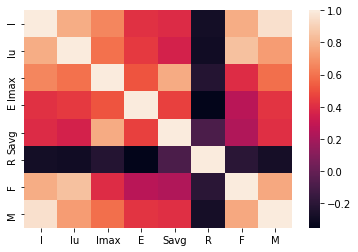

In [429]:
sns.heatmap(customer_profile.corr());

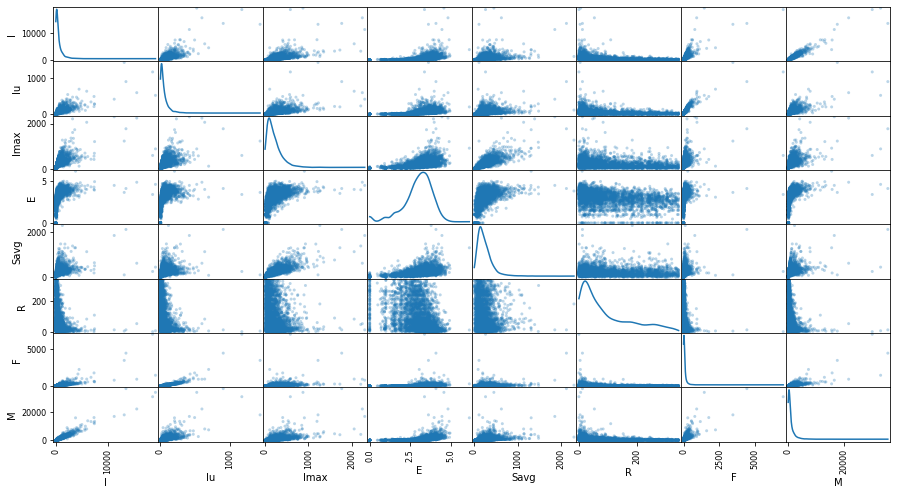

In [430]:
# produce a scatter matrix for each pair of features in the data
scatter_matrix(customer_profile, alpha=0.3, figsize=(15,8), diagonal='kde');

We can notice that we have a skewed distribution of the variables and there exist outliers.

This indicates how normalization is required to make the data features normally distributed as clustering algorithms require them to be normally distributed.

In [439]:
log_customer_profile = pd.DataFrame({'I': np.log(customer_profile['I']),
                                     'Iu': np.log(customer_profile['Iu']),
                                     'Imax': np.log(customer_profile ['Imax']),
                                     'E': np.log(customer_profile['E'] + 0.1), # can't take log(0) and so add a small number
                                     'Savg': np.log(customer_profile['Savg']),
                                     'R': np.log(customer_profile['R'] + 0.1), # can't take log(0) and so add a small number
                                     'F': np.log(customer_profile['F']),
                                     'M': np.log(customer_profile['M'])})
log_customer_profile

,I,Iu,Imax,E,Savg,R,F,M
CustomerID,,,,,,,,
12747.0,6.674561,3.367296,4.941642,1.363873,5.475924,3.139833,4.174387,7.673149
12748.0,9.485925,7.273786,7.108244,1.317581,4.696793,1.410987,8.143517,9.784390
12749.0,7.110696,4.787492,6.439350,1.323402,6.305446,3.139833,4.990433,7.914884
12820.0,6.513230,3.988984,5.497168,1.202255,5.442006,3.808882,4.060443,6.828301
12821.0,4.219508,1.609438,4.219508,0.483616,4.327042,4.565389,1.609438,4.327042
...,...,...,...,...,...,...,...,...
18280.0,3.688879,2.079442,3.688879,0.409217,4.919981,5.075799,2.079442,4.919981
18281.0,3.951244,1.609438,3.951244,0.385909,3.848444,1.410987,1.609438,3.848444
18282.0,3.931826,2.079442,3.258097,1.047319,4.035390,5.375741,2.079442,4.728538


In [440]:
log_customer_profile.corr()

,I,Iu,Imax,E,Savg,R,F,M
I,1.000000,0.857788,0.896653,0.641487,0.704494,-0.410136,0.884326,0.956254
Iu,0.857788,1.000000,0.778424,0.692489,0.617885,-0.346078,0.987087,0.824419
Imax,0.896653,0.778424,1.000000,0.644847,0.851051,-0.244754,0.758979,0.810922
E,0.641487,0.692489,0.644847,1.000000,0.581660,-0.218548,0.675576,0.628999
Savg,0.704494,0.617885,0.851051,0.581660,1.000000,-0.127252,0.592318,0.728465
R,-0.410136,-0.346078,-0.244754,-0.218548,-0.127252,1.000000,-0.387537,-0.428574
F,0.884326,0.987087,0.758979,0.675576,0.592318,-0.387537,1.000000,0.863314
M,0.956254,0.824419,0.810922,0.628999,0.728465,-0.428574,0.863314,1.000000


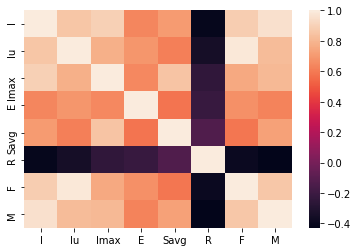

In [441]:
sns.heatmap(log_customer_profile.corr());

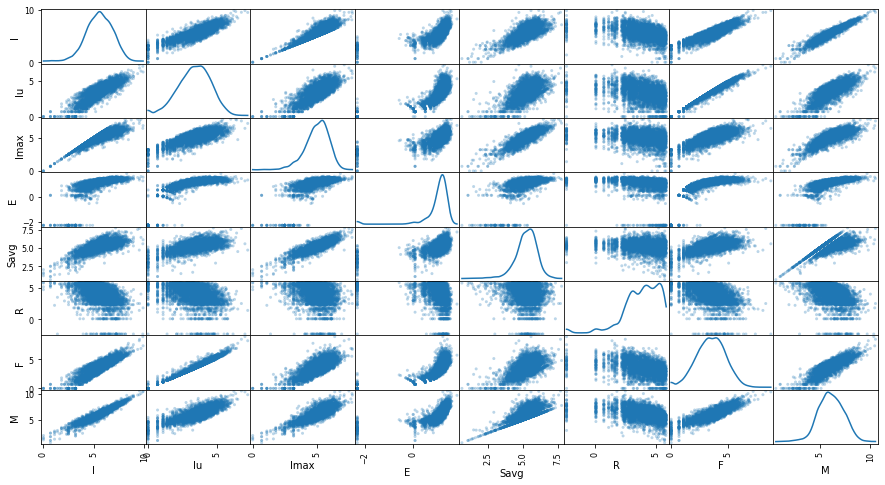

In [442]:
# produce a scatter matrix for each pair of features in the data
scatter_matrix(log_customer_profile, alpha=0.3, figsize=(15,8), diagonal='kde');

## Saving the Customer Profile model

In [443]:
log_customer_profile.to_csv('../dataset/customer_profile_model.csv', sep='\t')